<H1>ФБ-31 Федорович Дарина.</H1>
<H1>Лабараторна робота № 4. Структури для роботи з великими обсягами даних в Python</H1>
Завдання другого рівня

Налаштування середовища для даної лабараторної роботи

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print("Setup is complete")

Setup is complete


Функція для створення DataFrame з CSV файлу, перевіряє на пропущені значення, видаляє рядки з пропущеними значеннями, перетворює очищені дані в NumPy масив 
1. Поборотися із зниклими даними.

In [ ]:
def create_wine_quality_dataframe(file_path):
    df = pd.read_csv(file_path, delimiter=';')

    df_cleaned = df.dropna()
    np_array_cleaned = df_cleaned.values

    print("\n--- Статистика по стовпцях ---")
    print(df_cleaned.describe())

    return df_cleaned, np_array_cleaned

def handle_missing_values(df):
    df_filled = df.fillna(df.mean())
    return df_filled

file_path = 'winequality-red.csv'
wine_df, wine_np = create_wine_quality_dataframe(file_path)

wine_df_filled = handle_missing_values(wine_df)
wine_np_filled = np.nan_to_num(wine_np, nan=np.nanmean(wine_np))

print("\nПерші 5 рядків очищеного DataFrame:")
print(wine_df.head().to_string(index=False))  

print("\nПерші 5 рядків після заповнення пропущених значень DataFrame:")
print(wine_df_filled.head().to_string(index=False)) 

print("\nПерші 5 рядків очищеного NumPy масиву:")
print(np.array2string(wine_np[:5], formatter={'all': lambda x: f'{x:.2f}'}))

print("\nПерші 5 рядків після заповнення пропущених значень NumPy масиву:")
print(np.array2string(wine_np_filled[:5], formatter={'all': lambda x: f'{x:.2f}'}))



--- Статистика по стовпцях ---
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.0120

2. Пронормувати вибраний датасет або стандартизувати його (нормування і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

-Нормалізація

In [4]:
def normalize(df):
    normalized_df = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        min_value = df[column].min()
        max_value = df[column].max()
        normalized_df[column] = (df[column] - min_value) / (max_value - min_value)
    return normalized_df

wine_df_normalized = normalize(wine_df)

def normalize_np(np_array):
    min_value = np.min(np_array, axis=0)
    max_value = np.max(np_array, axis=0)
    return (np_array - min_value) / (max_value - min_value)

wine_np_normalized = normalize_np(wine_np)

print("\nПерші 5 рядків нормалізованого DataFrame:")
print(wine_df_normalized.head().to_string(index=False)) 

print("\nПерші 5 рядків нормалізованого NumPy масиву:")

print(np.array2string(wine_np_normalized[:5], formatter={'all': lambda x: f'{x:.2f}'}))



Перші 5 рядків нормалізованого DataFrame:
 fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  sulphates  alcohol  quality
      0.247788          0.397260         0.00        0.068493   0.106845             0.140845              0.098940 0.567548 0.606299   0.137725 0.153846      0.4
      0.283186          0.520548         0.00        0.116438   0.143573             0.338028              0.215548 0.494126 0.362205   0.209581 0.215385      0.4
      0.283186          0.438356         0.04        0.095890   0.133556             0.197183              0.169611 0.508811 0.409449   0.191617 0.215385      0.4
      0.584071          0.109589         0.56        0.068493   0.105175             0.225352              0.190813 0.582232 0.330709   0.149701 0.215385      0.6
      0.247788          0.397260         0.00        0.068493   0.106845             0.140845              0.098940 0.567548 0.606299   0.1377

-Стандартизація

In [5]:
def standardize(df):
    standardized_df = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        mean_value = df[column].mean()
        std_dev = df[column].std()
        standardized_df[column] = (df[column] - mean_value) / std_dev
    return standardized_df

wine_df_standardized = standardize(wine_df)

# Для NumPy масиву:
def standardize_np(np_array):
    mean_value = np.mean(np_array, axis=0)
    std_dev = np.std(np_array, axis=0)
    return (np_array - mean_value) / std_dev

wine_np_standardized = standardize_np(wine_np)

print("\nПерші 5 рядків стандартизованого DataFrame:")
print(wine_df_standardized.head().to_string(index=False))

print("\nПерші 5 рядків стандартизованого NumPy масиву:")
print(np.array2string(wine_np_standardized[:5], formatter={'all': lambda x: f'{x:.2f}'}))



Перші 5 рядків стандартизованого DataFrame:
 fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density        pH  sulphates   alcohol   quality
     -0.528194          0.961576    -1.391037       -0.453077  -0.243630            -0.466047             -0.379014 0.558100  1.288240  -0.579025 -0.959946 -0.787576
     -0.298454          1.966827    -1.391037        0.043403   0.223805             0.872365              0.624168 0.028252 -0.719708   0.128910 -0.584594 -0.787576
     -0.298454          1.296660    -1.185699       -0.169374   0.096323            -0.083643              0.228975 0.134222 -0.331073  -0.048074 -0.584594 -0.787576
      1.654339         -1.384011     1.483689       -0.453077  -0.264878             0.107558              0.411372 0.664069 -0.978798  -0.461036 -0.584594  0.450707
     -0.528194          0.961576    -1.391037       -0.453077  -0.243630            -0.466047             -0.379014 0.558100 

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

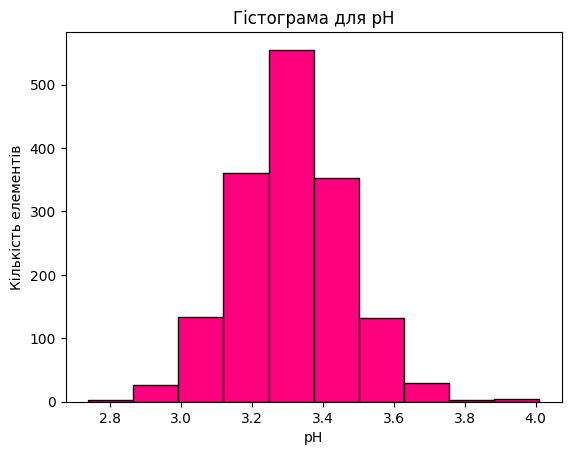

In [6]:
def plot_histogram(df, column, bins):
    plt.hist(df[column], bins=bins, edgecolor='black', color='#FF007F')
    plt.title(f'Гістограма для {column}')
    plt.xlabel(column)
    plt.ylabel('Кількість елементів')
    plt.show()

bins = np.linspace(wine_df["pH"].min(), wine_df["pH"].max(), 11)

plot_histogram(wine_df, 'pH', bins)

4. Збудувати графік залежності одного integer/real атрибута від іншого.

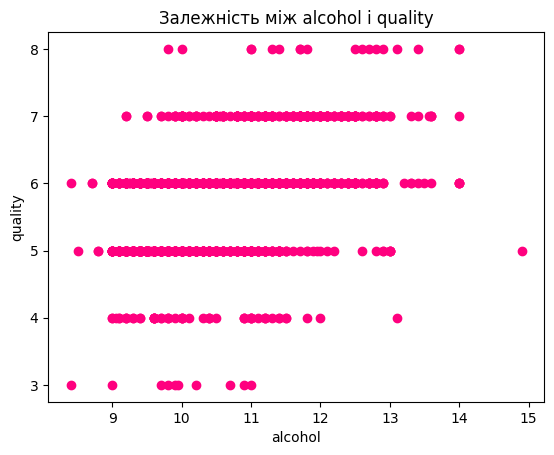

In [7]:
def plot_scatter(df, column1, column2):
    plt.scatter(df[column1], df[column2], color='#FF007F')
    plt.title(f'Залежність між {column1} і {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

plot_scatter(wine_df, 'alcohol', 'quality')

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [8]:
def calculate_correlations(df, column1, column2):
    pearson_corr = df[column1].corr(df[column2], method='pearson')
    spearman_corr = df[column1].corr(df[column2], method='spearman')
    print(f"Коефіцієнт Пірсона між {column1} і {column2}: {pearson_corr}")
    print(f"Коефіцієнт Спірмена між {column1} і {column2}: {spearman_corr}")

calculate_correlations(wine_df, 'alcohol', 'quality')

Коефіцієнт Пірсона між alcohol і quality: 0.4761663240011362
Коефіцієнт Спірмена між alcohol і quality: 0.47853168747024344


6. Провести One Hot Encoding категоріального string атрибуту.

In [9]:
def one_hot_encoding(df, column):
    df_encoded = pd.get_dummies(df, columns=[column], drop_first=True)
    return df_encoded

wine_df_encoded = one_hot_encoding(wine_df, 'quality')

print("\nПерші 5 рядків після One Hot Encoding для стовпця 'quality':")
print(wine_df_encoded.head().to_string(index=False))



Перші 5 рядків після One Hot Encoding для стовпця 'quality':
 fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  quality_4  quality_5  quality_6  quality_7  quality_8
           7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978 3.51       0.56      9.4      False       True      False      False      False
           7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968 3.20       0.68      9.8      False       True      False      False      False
           7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970 3.26       0.65      9.8      False       True      False      False      False
          11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   

7. Провести візуалізацію багатовимірних даних

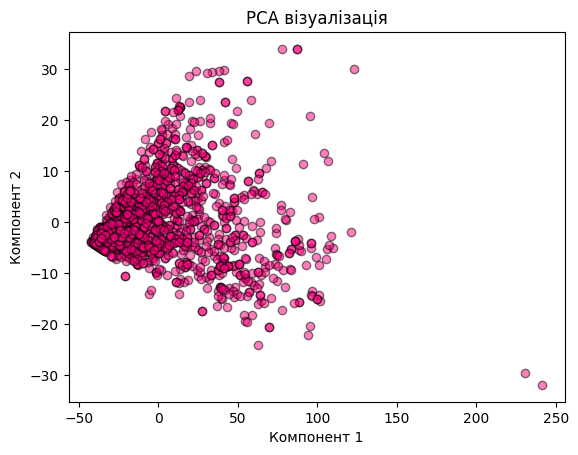

In [10]:
def plot_pca(df):
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(df.select_dtypes(include=['float64', 'int64']))
    
    plt.scatter(pca_components[:, 0], pca_components[:, 1], c='#FF007F', edgecolor='black', alpha=0.5)
    plt.title('PCA візуалізація')
    plt.xlabel('Компонент 1')
    plt.ylabel('Компонент 2')
    plt.show()

plot_pca(wine_df)
